In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [10]:
df = pd.read_csv("../NewData.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)

In [11]:
df.head(10)

,Gender,Age,Height,Weight,BMI,Hypertension,SBP,DBP,PR,Drink,Smoke,FPG,AST,ALT,BUN,Scr,TG,TC,Outcome
0,1,79,160,60.0,13.40,1,142,80,86,0,0,4.22,26.2,13.5,6.74,69.6,0.58,6.34,0
1,1,81,153,38.0,16.20,0,132,74,69,0,0,6.27,19.9,16.2,3.70,51.6,0.88,4.96,0
2,1,85,157,40.0,16.23,1,160,90,89,0,0,5.50,14.3,9.3,6.95,98.3,0.94,3.80,0
3,1,78,155,40.0,16.65,0,126,74,58,0,0,6.70,17.8,11.3,5.40,68.6,1.82,3.16,1
4,0,43,166,46.0,16.70,1,136,84,77,0,0,5.72,25.9,57.9,3.10,56.0,2.74,5.26,0
5,0,68,158,43.0,17.20,0,132,78,56,0,0,4.60,66.9,61.5,9.95,140.9,1.31,5.94,0
6,0,76,170,50.0,17.30,1,150,90,70,0,0,4.69,15.1,13.9,7.44,104.4,2.71,5.21,0
7,1,77,157,43.0,17.40,1,138,76,63,0,0,4.97,17.1,8.8,4.62,55.0,1.08,4.47,1
8,1,79,160,45.0,17.58,0,130,72,66,0,0,7.78,21.3,19.5,5.92,62.4,3.63,4.40,0
9,1,83,160,45.0,17.60,1,150,90,66,0,0,5.29,20.1,16.2,5.83,91.2,4.07,4.17,0


In [12]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'Hypertension', 'SBP',
       'DBP', 'PR', 'Drink', 'Smoke', 'FPG', 'AST', 'ALT', 'BUN', 'Scr', 'TG',
       'TC', 'Outcome'],
      dtype='object')

In [13]:
df['Gender'].describe()

count    682.00000
mean       0.63783
std        0.48098
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: Gender, dtype: float64

Gender
-1.6710503048071113
Age
1.9934348268477269
Height
-0.42009473508579465
Weight
1.0216063760224197
BMI
0.5396784718049563
Hypertension
-1.5810215094626432
SBP
0.026434711993707616
DBP
1.220234426840988
PR
1.4590521265407235
Drink
30.923394458998153
Smoke
40.48915542228884
FPG
13.272270111592835
AST
75.4148539324501
ALT
98.20358094534458
BUN
233.81647481277935
Scr
230.21809838132953
TG
12.630478382983423
TC
627.7319122171508
Outcome
-0.815364722668094


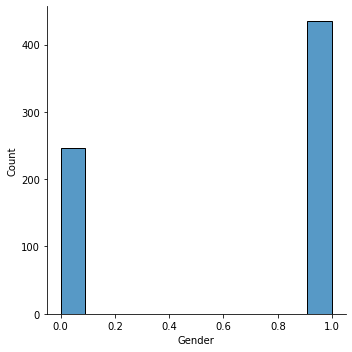

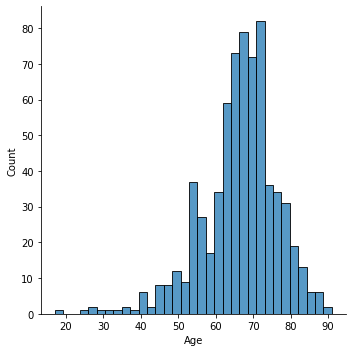

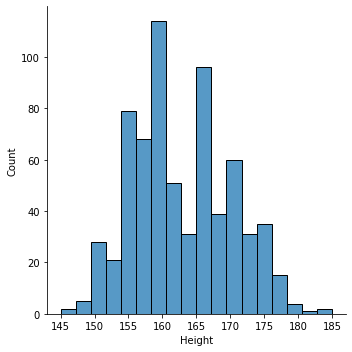

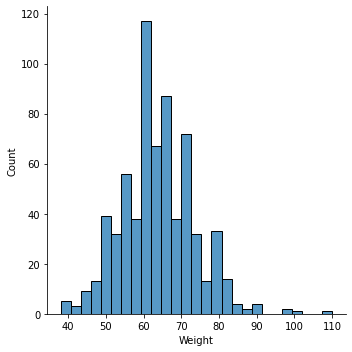

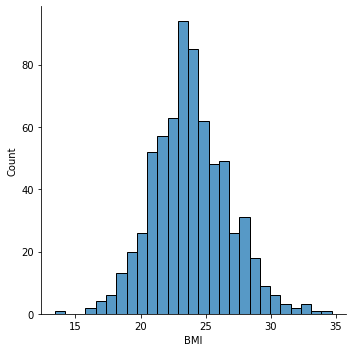

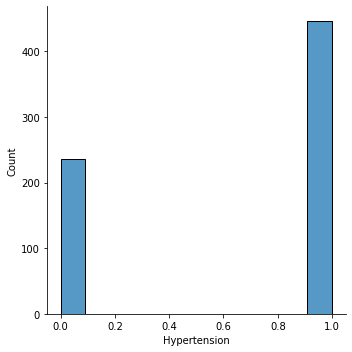

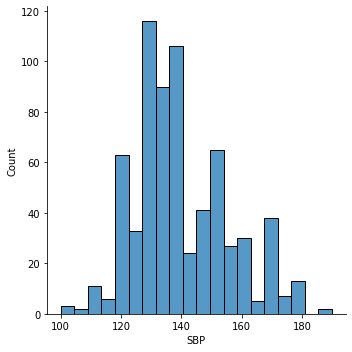

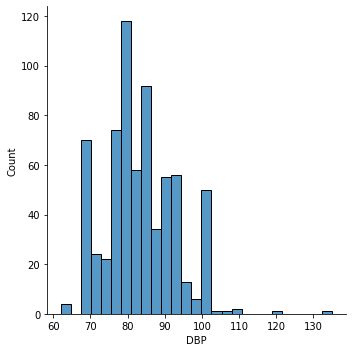

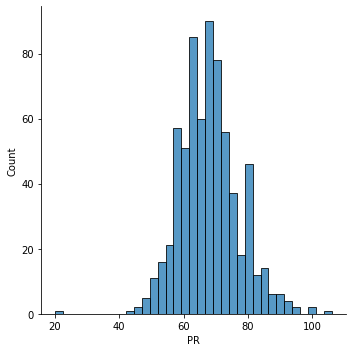

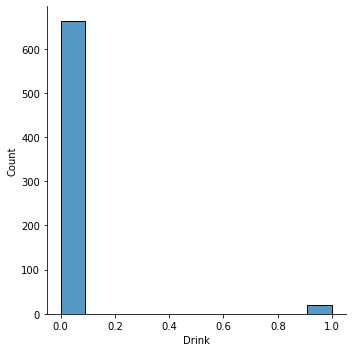

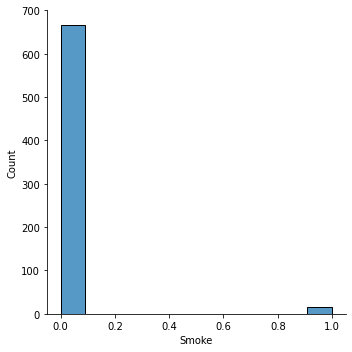

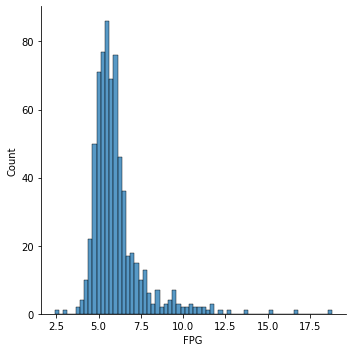

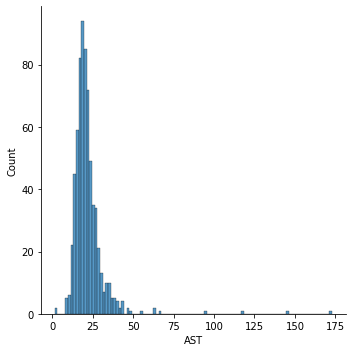

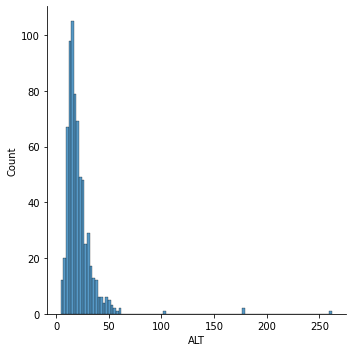

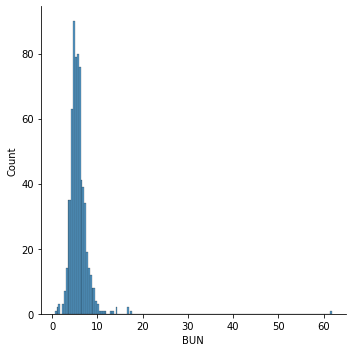

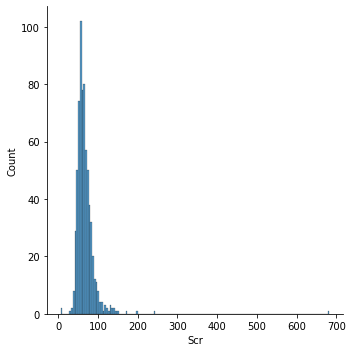

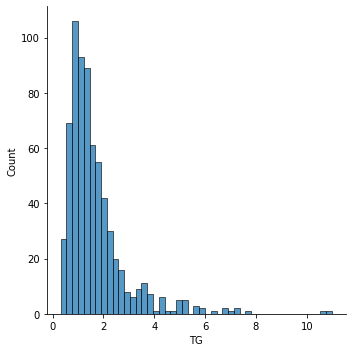

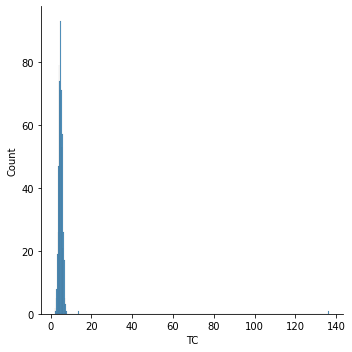

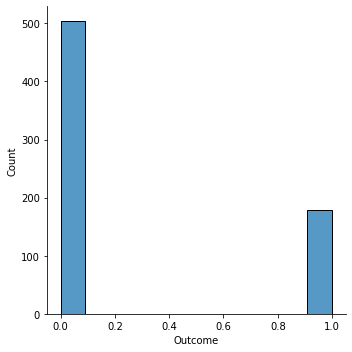

In [14]:
for x in df.columns:
    print(x)
    print(st.kurtosis(df[x]))
    sns.displot(df[x])
    #print("+++++++++++++++++++++++++++++++++++++++++++")

In [15]:
xtotrans = ['TC', 'TG', 'Scr', 'BUN', 'ALT', 'AST', 'FPG', 'DBP', 'SBP']

TC
kurtosis = 627.73191, skew = 24.63146, 
transform_lambda = -0.54527, transformed_kurtosis= 5.72791, transformed_skew=-0.33257
Jarque_beraResult(statistic=944.8927120259335, pvalue=0.0) 

TG
kurtosis = 12.63048, skew = 2.89019, 
transform_lambda = -0.26852, transformed_kurtosis= -0.04441, transformed_skew=0.00308
Jarque_beraResult(statistic=0.05712072878128219, pvalue=0.9718436276270899) 

Scr
kurtosis = 230.21810, skew = 12.21004, 
transform_lambda = 0.01909, transformed_kurtosis= 16.53108, transformed_skew=0.03119
Jarque_beraResult(statistic=7765.7208122951615, pvalue=0.0) 

BUN
kurtosis = 233.81647, skew = 12.18697, 
transform_lambda = 0.02458, transformed_kurtosis= 9.90157, transformed_skew=0.02596
Jarque_beraResult(statistic=2786.076439661278, pvalue=0.0) 

ALT
kurtosis = 98.20358, skew = 8.03008, 
transform_lambda = -0.26022, transformed_kurtosis= 1.31496, transformed_skew=-0.05546
Jarque_beraResult(statistic=49.4854269866296, pvalue=1.796285342692272e-11) 

AST
kurtosis = 75.4

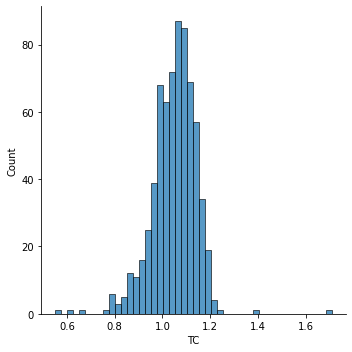

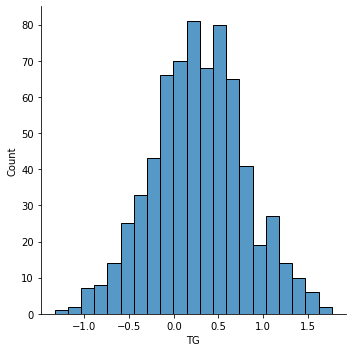

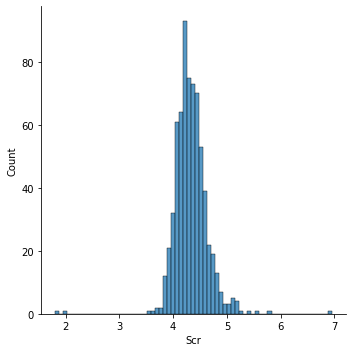

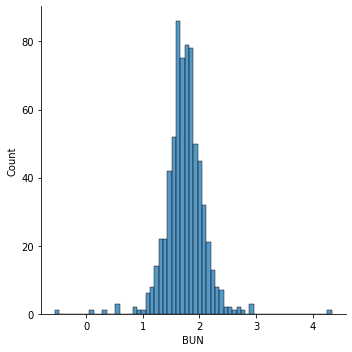

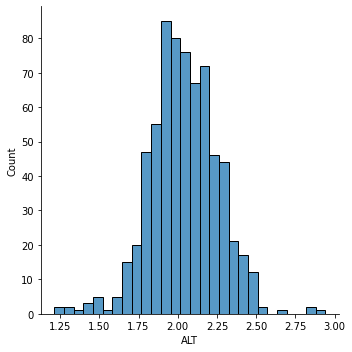

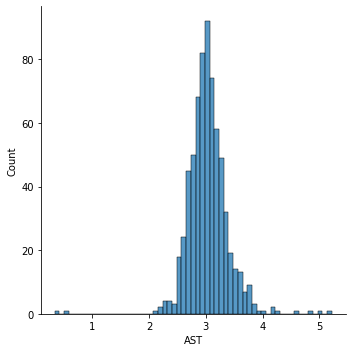

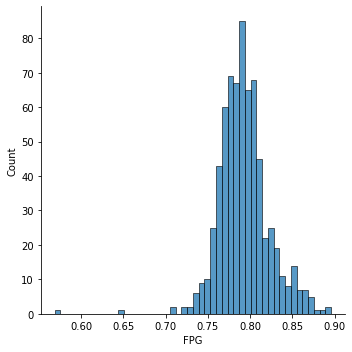

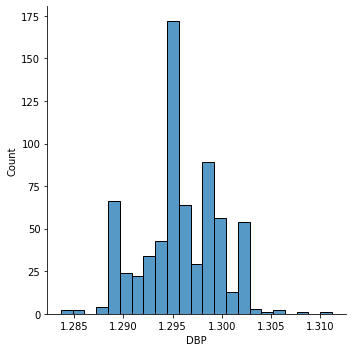

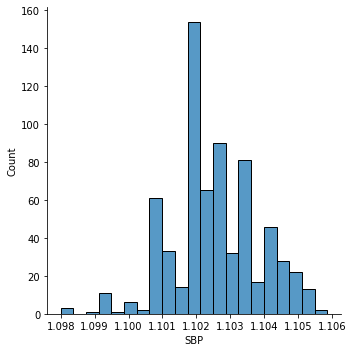

In [16]:
from scipy.optimize import minimize_scalar
df = pd.read_csv("../NewData.csv")#.drop(columns = ['Unnamed: 19']).dropna(axis = 0)
for x in xtotrans:
    print(x)
    #print(st.kurtosis(df[x]))
    #lower = df[x].describe()[4]
    #upper = df[x].describe()[6]
    #print(lower, upper)
    #prob = st.boxcox_normplot(df[x], lower, upper)
    #print(prob)
    xt, namda = st.boxcox(x = df[x], optimizer=minimize_scalar)
    #print(res)
    
    print("kurtosis = %.5f, skew = %.5f, \ntransform_lambda = %.5f, transformed_kurtosis= %.5f, transformed_skew=%.5f" %( st.kurtosis(df[x]), st.skew(df[x]), namda, st.kurtosis(xt), st.skew(xt)))
    jbtest = st.jarque_bera(xt)
    print(jbtest, "\n")
    df[x] = xt
    sns.displot(df[x])

df.to_csv("../Boxcox_data.csv", index=False)